In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

### 1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

### Ответ: в принципе все могут быть временными, однако требует уточнения формулировка п. в)

### 2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

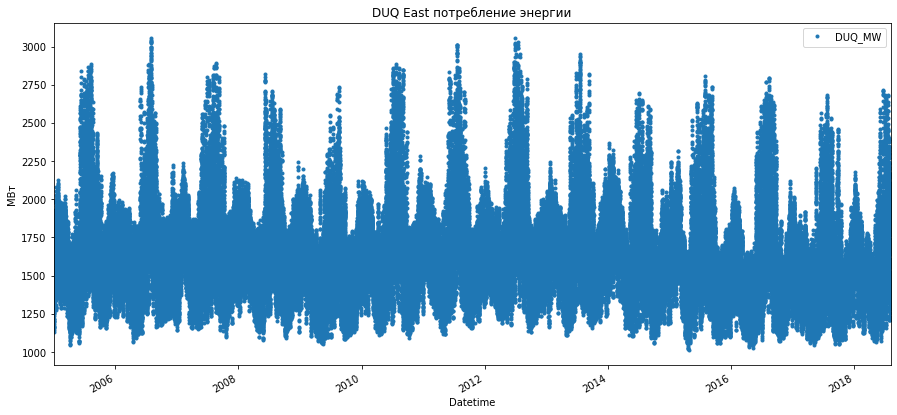

In [6]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ East потребление энергии' )
plt.ylabel ( 'МВт' )

#### Найдем пропуски и дублирования во временном ряду

In [ ]:
# Все часовики по диапазону датасета
my_data_time_h = pd.date_range(data.index.min(), data.index.max(), freq="H")

In [30]:
# Часовики, не входящие в датасет
set(my_data_time_h) - set(data.index.unique())

{Timestamp('2005-04-03 03:00:00', freq='H'),
 Timestamp('2005-10-30 02:00:00', freq='H'),
 Timestamp('2006-04-02 03:00:00', freq='H'),
 Timestamp('2006-10-29 02:00:00', freq='H'),
 Timestamp('2007-03-11 03:00:00', freq='H'),
 Timestamp('2007-11-04 02:00:00', freq='H'),
 Timestamp('2008-03-09 03:00:00', freq='H'),
 Timestamp('2008-11-02 02:00:00', freq='H'),
 Timestamp('2009-03-08 03:00:00', freq='H'),
 Timestamp('2009-11-01 02:00:00', freq='H'),
 Timestamp('2010-03-14 03:00:00', freq='H'),
 Timestamp('2010-11-07 02:00:00', freq='H'),
 Timestamp('2010-12-10 00:00:00', freq='H'),
 Timestamp('2011-03-13 03:00:00', freq='H'),
 Timestamp('2011-11-06 02:00:00', freq='H'),
 Timestamp('2012-03-11 03:00:00', freq='H'),
 Timestamp('2012-11-04 02:00:00', freq='H'),
 Timestamp('2013-03-10 03:00:00', freq='H'),
 Timestamp('2013-11-03 02:00:00', freq='H'),
 Timestamp('2014-03-09 03:00:00', freq='H'),
 Timestamp('2015-03-08 03:00:00', freq='H'),
 Timestamp('2016-03-13 03:00:00', freq='H'),
 Timestamp

In [17]:
data['date'] = data.index

In [35]:
# Повторяющиеся часовики
count_data = data['date'].value_counts()
count_data[count_data==2]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

### Выводы:
Данные пропущены в 2-3 часа ночи во все годы в отдельные дни в марте-апреле, октябре-декабре. Данные задублированы в начале ноября в последние годы. Возможно, связано со сменой сезонов и изменением режима работы систем мониторинга.

### 3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [59]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


#### Перерасчет делаем по ценам закрытия периода

In [62]:
brent_data.resample("W").last().head()

,Значение
Дата,
2010-09-05,76.63
2010-09-12,78.36
2010-09-19,78.23
2010-09-26,78.94
2010-10-03,83.69


In [63]:
brent_data.resample("M").last().head()

,Значение
Дата,
2010-09-30,82.11
2010-10-31,83.26
2010-11-30,85.45
2010-12-31,94.59
2011-01-31,100.56


### 4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

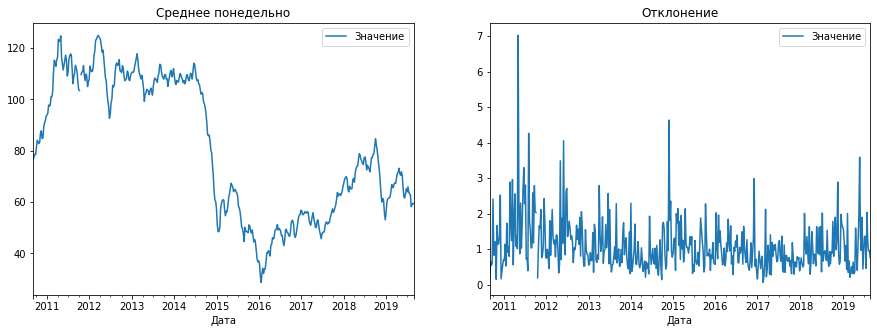

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
brent_data.resample("W").mean().plot(ax=axes[0], title='Среднее понедельно')
brent_data.resample("W").std().plot(ax=axes[1], title='Отклонение')
plt.show()

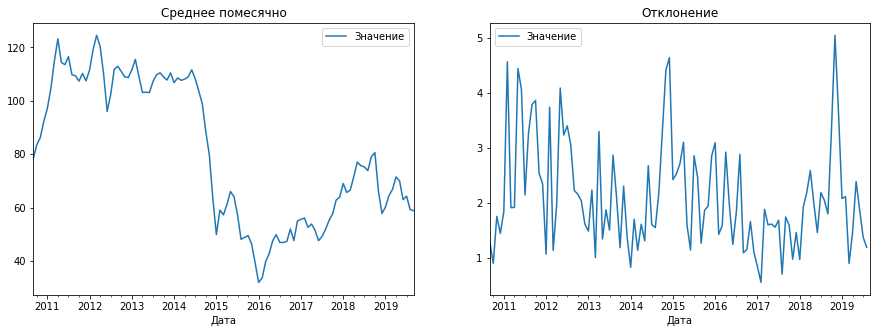

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
brent_data.resample("M").mean().plot(ax=axes[0], title='Среднее помесячно')
brent_data.resample("M").std().plot(ax=axes[1], title='Отклонение')
plt.show()

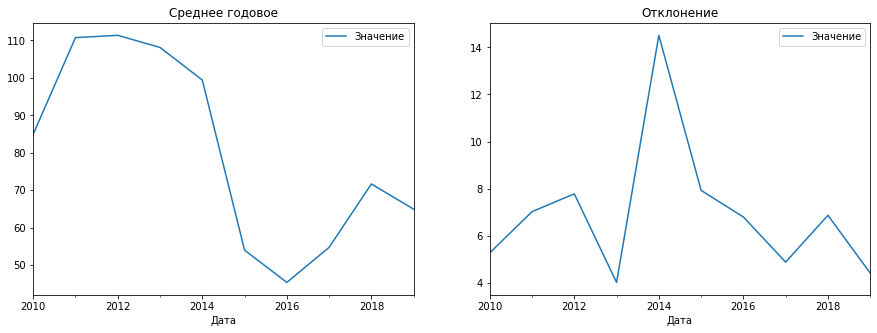

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
brent_data.resample("Y").mean().plot(ax=axes[0], title='Среднее годовое')
brent_data.resample("Y").std().plot(ax=axes[1], title='Отклонение')
plt.show()

### 5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

### Графики по большему периоду усреднения выглядят боле сглаженными. Интересно, что пики недельных отклонений иногда (2011) превышают пики месячных, тем самым отмечая точки повышенной волатильности рынка при смене тренда.